In [2]:
import matplotlib.pyplot as plt
import numpy as np

import bk.load
import bk.compute
import bk.signal

import neuroseries as nts

from tqdm import tqdm

In [3]:
bk.load.current_session_linux(byrat = 8, byday = 7)
rip = bk.load.ripples()

neurons, metadata = bk.load.spikes()
chans = {
    'bla_left':bk.load.bla_channels()['left'],
    'bla_right':bk.load.bla_channels()['right'],
    'hpc':bk.load.ripple_channel()
}

Rat : 8 on day : 7
Working with session Rat08-20130715 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130715
Data already saved in Numpy format, loading them from here:
Rat08-20130715-neurons.npy
Rat08-20130715-metadata.npy


In [31]:
bla_neurons = neurons[(metadata.Region == 'BLA') & (metadata.Type == 'Int')]
t, actmat = bk.compute.binSpikes(bla_neurons,0.025)
actmat = nts.TsdFrame(t,actmat.T,time_units='s')

In [32]:
window = 1*1_000_000
fr = []
for peak in tqdm(rip['peak'].index.values):
    start = peak-window
    end = peak+window

    inter = nts.IntervalSet(start,end)
    fr.append(np.sum(actmat.restrict(inter).values,1))

    
    # fig,ax = plt.subplots(3,2,sharex=True,figsize = (16,8))
    # for i,(k,lfp) in enumerate(lfps.items()):
    #     ax[i,0].plot(lfp.as_units('s'))
    #     ax[i,0].set_title(k)
    #     ax[i,0].axvline(peak/1_000_000,color = 'red')

    #     ax[i,1].pcolormesh(t,f,specs[k],shading = 'gouraud')
    #     ax[i,1].set_ylabel('Freq(Hz)')
    #     ax[i,1].set_xlabel('Times (s)')



100%|██████████| 4026/4026 [01:07<00:00, 60.00it/s]


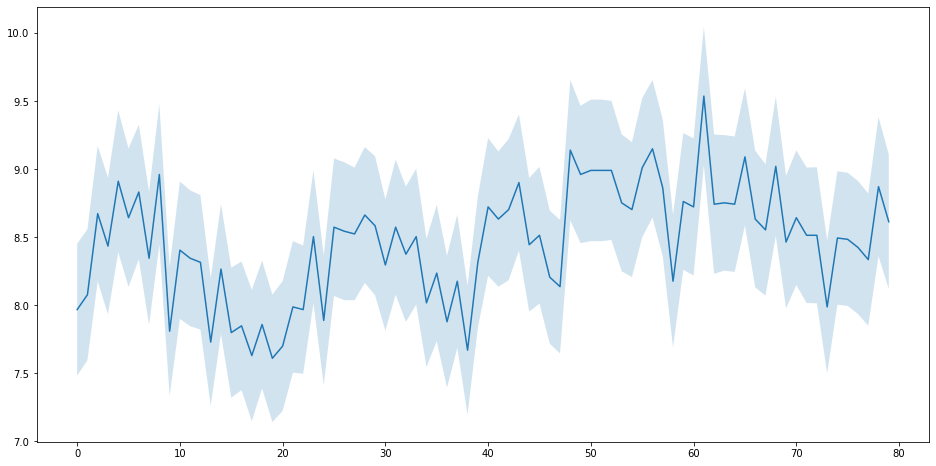

In [33]:
plt.figure(figsize=(16,8))
averaged = np.average(fr,0)/0.025
plt.plot(np.average(fr,0)/0.025)
std = np.std(fr,0)
plt.fill_between(np.arange(len(std)),averaged-std,averaged+std,alpha = 0.2)

In [12]:
window = 0.5*1_000_000
c = 0
lfps = {}
# specs = {}
for stru,chan in chans.items():
    lfps.update({stru:[]})
    # specs.update({stru:[]})

for peak in tqdm(rip['peak'].index.values):
    start = peak-window
    end = peak+window

    inter = nts.IntervalSet(start,end)
    
    for stru,chan in chans.items():
        # lfps.update({stru:bk.load.lfp_in_intervals(chan,inter)})
        lfps[stru].append(bk.load.lfp_in_intervals(chan,inter))
        # t,f,s = bk.signal.wavelet_spectrogram(lfps[stru][-1],fmin = 3,fmax = 300,nfreq= 100)
        # specs.update({stru:s})
        # specs[stru].append(s)

    
    # fig,ax = plt.subplots(3,2,sharex=True,figsize = (16,8))
    # for i,(k,lfp) in enumerate(lfps.items()):
    #     ax[i,0].plot(lfp.as_units('s'))
    #     ax[i,0].set_title(k)
    #     ax[i,0].axvline(peak/1_000_000,color = 'red')

    #     ax[i,1].pcolormesh(t,f,specs[k],shading = 'gouraud')
    #     ax[i,1].set_ylabel('Freq(Hz)')
    #     ax[i,1].set_xlabel('Times (s)')

    # plt.tight_layout()
    # c+=1
    # if c == 200: break


100%|██████████| 5808/5808 [21:27<00:00,  4.51it/s]


In [13]:
from scipy.stats import sem

NameError: name 'lfps' is not defined

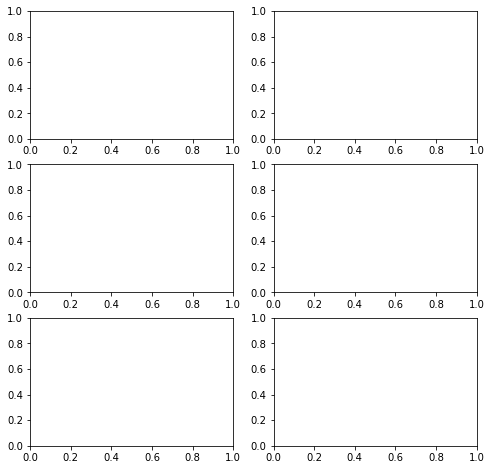

In [5]:
fig,ax = plt.subplots(3,2,sharex = False,figsize = (8,8))
for i,(k,lfp) in enumerate(lfps.items()):
    averaged = np.mean(lfp,0)
    std = np.std(lfp,0)
    # std = sem(lfp,0)
    ax[i,0].plot(averaged)
    ax[i,0].fill_between(np.arange(len(std)),averaged-std,averaged+std,alpha = 0.2)
    ax[i,0].set_title(k)
    # ax[i,0].axvline(peak/1_000_000,color = 'red')

    # ax[i,1].pcolormesh(t,f,np.mean(specs[k],0),shading = 'gouraud')
    # ax[i,1].set_ylabel('Freq(Hz)')
    # ax[i,1].set_xlabel('Times (s)')

plt.tight_layout()